In [1]:
from astropy import units as u
from astropy.constants import m_e, c, hbar
import numpy as np
import matplotlib.pyplot as plt

In [2]:

k_F = 1 * (u.kg * u.m / u.s)    # Example value with correct units

x = (k_F / (m_e * c)).to(u.dimensionless_unscaled)  # Ensure x is dimensionless
x_val = x.value  # Get the numerical value

constant_pressure = m_e**4 * c**5 / (24 * np.pi**2 * hbar**3)
function = ((2*x_val**3 - 3*x_val) * np.sqrt(1 + x_val**2) + 3 * np.arcsinh(x_val))
pressure = (constant_pressure * function).to('erg/cm3')

print('Pressure:', pressure)

constant_energy = m_e**4 * c**5 / (8 * np.pi**2 * hbar**3)
constant_energy2 = m_e**4 * c**5 / (np.pi**2 * hbar**3)
function_energy = (2*x_val**3 + x_val) * np.sqrt(1 + x_val**2) - np.arcsinh(x_val)
energy_density = constant_energy * function_energy
print('Energy density:', energy_density.to('erg/cm3'))
print('Energy cte:', constant_energy2.to('erg/cm3'))


Pressure: 2.158297105356366e+109 erg / cm3
Energy density: 6.4748913160690975e+109 erg / cm3
Energy cte: 1.4405597245585048e+24 erg / cm3


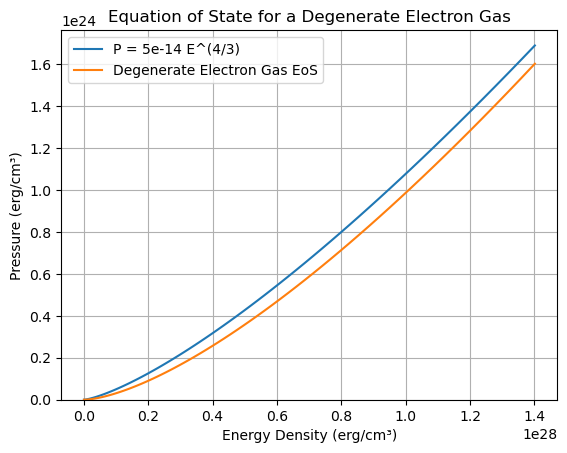

In [3]:
x_val = np.linspace(0, 2, 100) # k_F = x_val * m_e * c

constant_pressure = m_e**4 * c**5 / (24 * np.pi**2 * hbar**3)
function_pressure = ((2*x_val**3 - 3*x_val) * np.sqrt(1 + x_val**2) + 3 * np.arcsinh(x_val))
pressure = (constant_pressure * function_pressure).to('erg/cm3')

constant_energy = m_e**4 * c**5 / (8 * np.pi**2 * hbar**3)
function_energy = (2*x_val**3 + x_val) * np.sqrt(1 + x_val**2) - np.arcsinh(x_val)
energy_density = (constant_energy * function_energy).to('erg/cm3')

# Add rest-mass energy of nucleons
k_f = x_val * m_e * c
n = (k_f**3 / (3 * np.pi**2 * hbar**3)).to('1/cm3') 
nucleons_per_electron = 2  # For a carbon-oxygen white dwarf
energy_nucleons = n * nucleons_per_electron * (931.5 * u.MeV).to('erg')  
energy_density += energy_nucleons


plt.plot(energy_density, energy_density**(4/3)*5e-14, label = 'P = 5e-14 E^(4/3)')

plt.plot(energy_density, pressure, label = 'Degenerate Electron Gas EoS')
plt.xlabel('Energy Density (erg/cm³)')
plt.ylabel('Pressure (erg/cm³)')
plt.title('Equation of State for a Degenerate Electron Gas')
plt.ylim(0, max(pressure.value)*1.1)
plt.grid()
plt.legend()
plt.show()



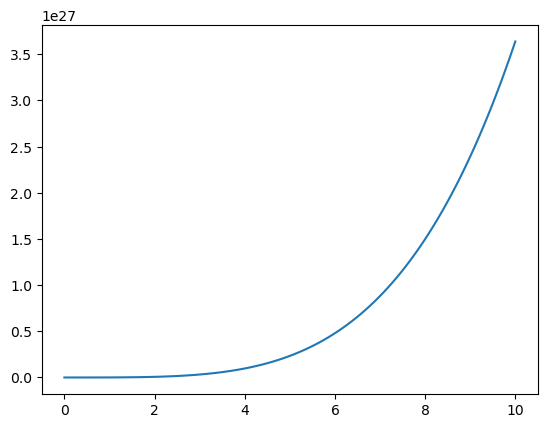

In [4]:
x_val = np.linspace(0, 10, 100) 

constant_energy = m_e**4 * c**5 / (8 * np.pi**2 * hbar**3)
function_energy = (2*x_val**3 + x_val) * np.sqrt(1 + x_val**2) - np.arcsinh(x_val)
energy_density = (constant_energy * function_energy).to('erg/cm3')

plt.plot(x_val, energy_density, label = 'Degenerate Electron Gas EoS')
plt.show()

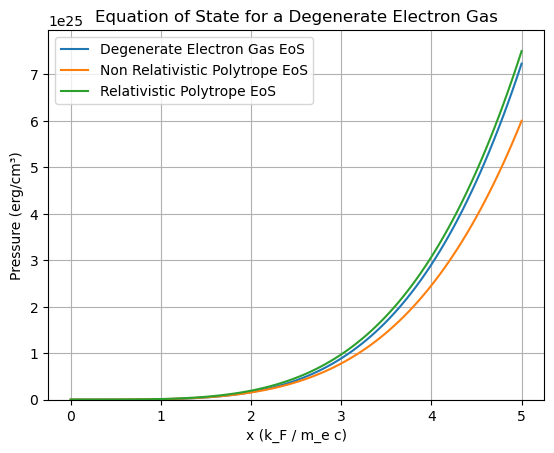

In [5]:
x_val = np.linspace(0, 5, 100)

constant_pressure = m_e**4 * c**5 / (24 * np.pi**2 * hbar**3)
function_pressure = ((2*x_val**3 - 3*x_val) * np.sqrt(1 + x_val**2) + 3 * np.arcsinh(x_val))
pressure = (constant_pressure * function_pressure).to('erg/cm3')


constant_energy = m_e**4 * c**5 / (8 * np.pi**2 * hbar**3)
function_energy = (2*x_val**3 + x_val) * np.sqrt(1 + x_val**2) - np.arcsinh(x_val)
energy_density = (constant_energy * function_energy).to('erg/cm3')


plt.plot(x_val, pressure, label = 'Degenerate Electron Gas EoS')




pressure_nonrel = (m_e**4 * c**5 / (15 * np.pi**2 * hbar**3) * x_val**4).to('erg/cm3')
pressure_rel = (m_e**4 * c**5 / (12 * np.pi**2 * hbar**3) * x_val**4).to('erg/cm3')

plt.plot(x_val,pressure_nonrel, label = 'Non Relativistic Polytrope EoS')
plt.plot(x_val,pressure_rel, label = 'Relativistic Polytrope EoS')
plt.xlabel('x (k_F / m_e c)')
plt.ylabel('Pressure (erg/cm³)')
plt.title('Equation of State for a Degenerate Electron Gas')
plt.ylim(0, max(pressure.value)*1.1)
plt.grid()
plt.legend()    


#fallen les constants 
plt.show()

In [6]:
from scipy.integrate import odeint

# Relativistic regime 

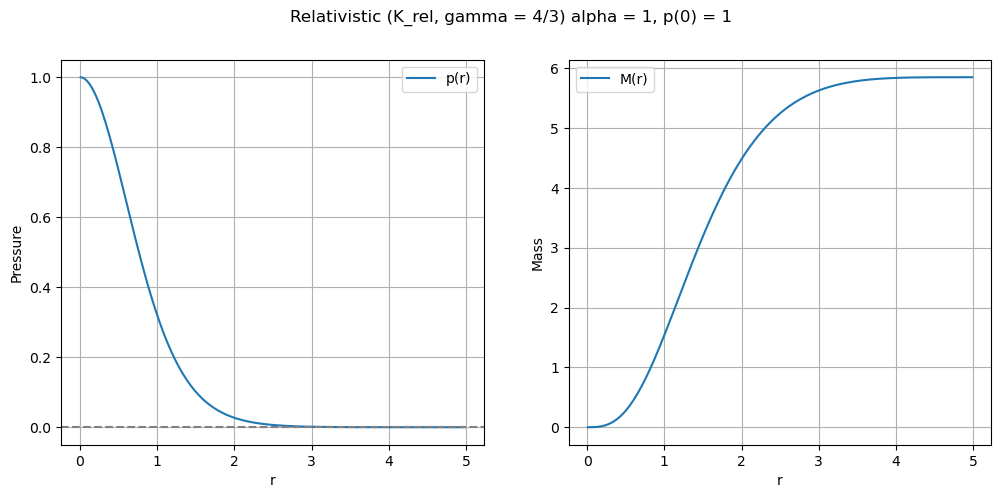

R = 4.986493246623312
M(R) = 5.847668128556384 solar masses
M(R) = 1.1631596674511502e+31 kg
p(R)= -6.711307878960263e-11 almost zero
p(0)= 1.5975423544476613e+39 erg / cm3


In [7]:
AZ = 1
K_rel = (hbar * c / 12 / np.pi**2 * ((3 * np.pi**2)/ (931.5 * u.MeV * AZ)) **(4/3)).to('cm / erg**(1/3)')
gamma = 4/3

alpha = 1 * u.km
R0 = 1.473 * u.km

e_0 = (( (R0 / alpha) ** gamma / K_rel ) **( 1/(gamma-1))).to('erg/cm3')
beta = (4 * np.pi * e_0 / (1.9891e30 * u.kg * c**2 * (K_rel * e_0 **(gamma-1))**(1/gamma))).to('1/km3')
    

def ode(x, r):

    p, M = x
    if p <= 0:
        return [0, 0]  
    
    dpdr = - alpha.value * M * p**(1/gamma) / r**2
    dMdr = beta.value * r**2 * p**(1/gamma)
    return [dpdr, dMdr]


x_init = [1, 0]
r = np.linspace(0.01, 50, 2000)  # integra llarg

sol = odeint(ode, x_init, r)

p = sol[:,0]
M = sol[:,1]

idx = np.where(p<=0)[0] # array amb els índexs on p<=0
if len(idx) > 0: 
    cutoff = idx[0]
    r = r[:cutoff+1]
    p = p[:cutoff+1]
    M = M[:cutoff+1]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.plot(r, p, label="p(r)")
ax1.axhline(0, color="gray", linestyle="--")
ax1.set_xlabel('r')
ax1.set_ylabel('Pressure')
ax1.legend()
ax1.grid()


ax2.plot(r, M, label="M(r)")
ax2.set_xlabel('r')
ax2.set_ylabel('Mass')
ax2.grid()
ax2.legend()

fig.suptitle('Relativistic (K_rel, gamma = 4/3) alpha = 1, p(0) = 1')

plt.show()



print("R =", r[-1])
print("M(R) =", M[-1], 'solar masses')
print("M(R) =", M[-1]* 1.9891e30, 'kg')  # Convert to kg using solar mass
print('p(R)=',p[-1], 'almost zero')

p_c = e_0
print('p(0)=', p_c)

The values obtained don't make sense for a white dwarf! Typical values  M(R) ~ 0.6 M_sun. R ~ 7000 km. Notice we found double mass but a very small radius!


In [8]:
# Expected energy density

expected_energy_density = 0.6 * 1.9891e30 * u.kg * c**2 / (4/3 * np.pi * (7000 * u.km )**3)
expected_energy_density_different_units = 0.6 / (4/3 * np.pi * (7000**3))
print('Expected energy density using known values:', expected_energy_density.to('erg/cm3'),',',expected_energy_density_different_units, '( M_0 c2 / km^3)' )

expected_pressure = (K_rel * expected_energy_density ** (4/3)).to('erg/cm3')
print('Expected central pressure:', expected_pressure.to('erg/cm3'))

p_0 = expected_pressure / e_0
print('Adimensional expected central pressure @alpha = 1', p_0)


Expected energy density using known values: 7.465631409476555e+26 erg / cm3 , 4.176077223985592e-13 ( M_0 c2 / km^3)
Expected central pressure: 9.709754762151097e+22 erg / cm3
Adimensional expected central pressure @alpha = 1 6.077932603863999e-17


Repeat for the found parameters

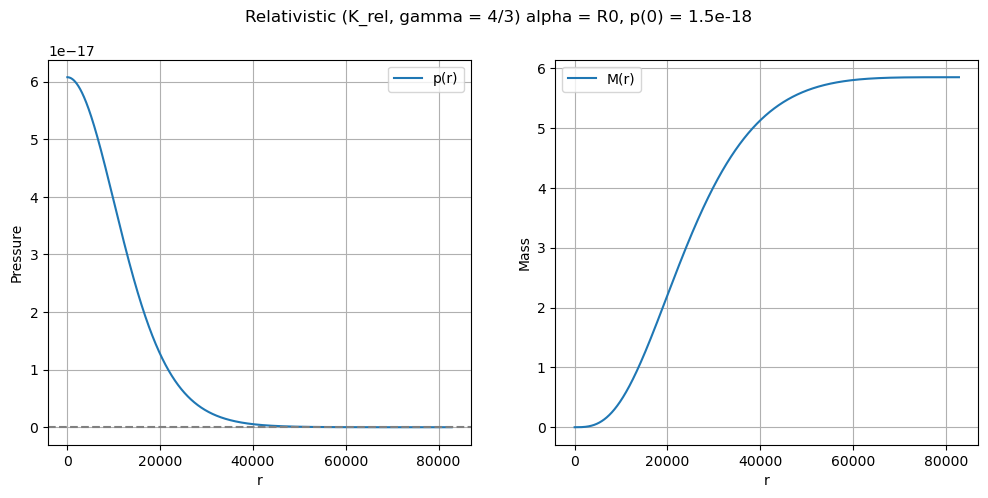

R = 82836.86976223659
M(R) = 5.847650696671988 solar masses
M(R) = 1.1631562000750252e+31 kg
p(R)= -5.9823869708141135e-31 almost zero
p(0)= 6.077932603863999e-17


In [9]:
AZ = 1
K_rel = (hbar * c / 12 / np.pi**2 * ((3 * np.pi**2)/ (931.5 * u.MeV * AZ)) **(4/3)).to('cm / erg**(1/3)')
gamma = 4/3

R0 = 1.473 * u.km

alpha = R0

e_0 = (( (R0 / alpha) ** gamma / K_rel ) **( 1/(gamma-1))).to('erg/cm3')
beta = (4 * np.pi * e_0 / (1.9891e30 * u.kg * c**2 * (K_rel * e_0 **(gamma-1))**(1/gamma))).to('1/km3')
    

def ode(x, r):

    p, M = x
    if p <= 0:
        return [0, 0]  
    
    dpdr = - alpha.value * M * p**(1/gamma) / r**2
    dMdr = beta.value * r**2 * p**(1/gamma)
    return [dpdr, dMdr]


x_init = [p_0, 0]
r = np.linspace(0.01, 700000, 3000000)  # integra llarg

sol = odeint(ode, x_init, r)

p = sol[:,0]
M = sol[:,1]

idx = np.where(p<=0)[0] # array amb els índexs on p<=0
if len(idx) > 0: 
    cutoff = idx[0]
    r = r[:cutoff+1]
    p = p[:cutoff+1]
    M = M[:cutoff+1]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.plot(r, p, label="p(r)")
ax1.axhline(0, color="gray", linestyle="--")
ax1.set_xlabel('r')
ax1.set_ylabel('Pressure')
ax1.legend()
ax1.grid()


ax2.plot(r, M, label="M(r)")
ax2.set_xlabel('r')
ax2.set_ylabel('Mass')
ax2.grid()
ax2.legend()

fig.suptitle('Relativistic (K_rel, gamma = 4/3) alpha = R0, p(0) = 1.5e-18')

plt.show()


print("R =", r[-1])
print("M(R) =", M[-1], 'solar masses')
print("M(R) =", M[-1]* 1.9891e30, 'kg')  # Convert to kg using solar mass
print('p(R)=',p[-1], 'almost zero')

print('p(0)=', p_0)


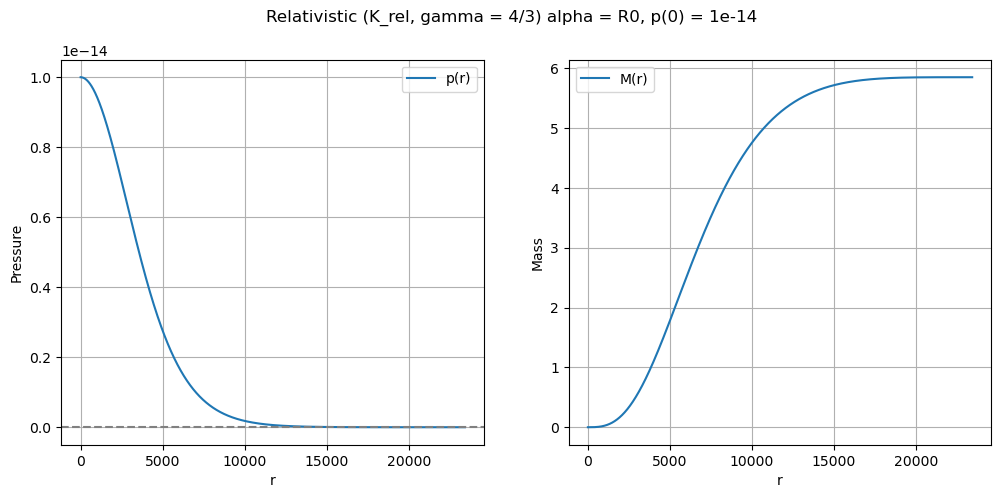

R = 23414.317470279155
M(R) = 5.847656471701821 solar masses
M(R) = 1.1631573487862091e+31 kg
p(R)= -2.483960032129048e-28 almost zero


In [10]:
AZ = 1
K_rel = (hbar * c / 12 / np.pi**2 * ((3 * np.pi**2)/ (931.5 * u.MeV * AZ)) **(4/3)).to('cm / erg**(1/3)')
gamma = 4/3
R0 = 1.473 * u.km

alpha = R0

e_0 = (( (R0 / alpha) ** gamma / K_rel ) **( 1/(gamma-1))).to('erg/cm3')
beta = (4 * np.pi * e_0 / (1.9891e30 * u.kg * c**2 * (K_rel * e_0 **(gamma-1))**(1/gamma))).to('1/km3')
    

def ode(x, r):

    p, M = x
    if p <= 0:
        return [0, 0]  
    
    dpdr = - alpha.value * M * p**(1/gamma) / r**2
    dMdr = beta.value * r**2 * p**(1/gamma)
    return [dpdr, dMdr]

x_init = [1e-14, 0]
r = np.linspace(0.01, 700000, 3000000)  # integra llarg

sol = odeint(ode, x_init, r)

p = sol[:,0]
M = sol[:,1]

idx = np.where(p<=0)[0] # array amb els índexs on p<=0
if len(idx) > 0: 
    cutoff = idx[0]
    r = r[:cutoff+1]
    p = p[:cutoff+1]
    M = M[:cutoff+1]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.plot(r, p, label="p(r)")
ax1.axhline(0, color="gray", linestyle="--")
ax1.set_xlabel('r')
ax1.set_ylabel('Pressure')
ax1.legend()
ax1.grid()


ax2.plot(r, M, label="M(r)")
ax2.set_xlabel('r')
ax2.set_ylabel('Mass')
ax2.grid()
ax2.legend()

fig.suptitle('Relativistic (K_rel, gamma = 4/3) alpha = R0, p(0) = 1e-14')

plt.show()


print("R =", r[-1])
print("M(R) =", M[-1], 'solar masses')
print("M(R) =", M[-1]* 1.9891e30, 'kg')  # Convert to kg using solar mass
print('p(R)=',p[-1], 'almost zero')


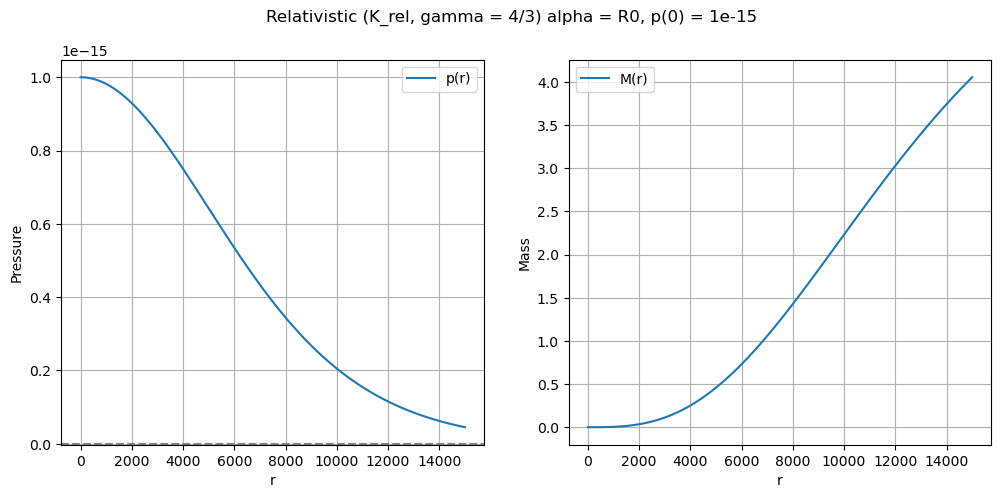

R = 15000.0
M(R) = 4.055779543486 solar masses
M(R) = 8.067351089948002e+30 kg
p(R)= 4.521535231261914e-17 almost zero


In [11]:
AZ = 1
K_rel = (hbar * c / 12 / np.pi**2 * ((3 * np.pi**2)/ (931.5 * u.MeV * AZ)) **(4/3)).to('cm / erg**(1/3)')
gamma = 4/3
R0 = 1.473 * u.km

alpha = R0

e_0 = (( (R0 / alpha) ** gamma / K_rel ) **( 1/(gamma-1))).to('erg/cm3')

#e_0 = 7.463e39 * u.erg / u.cm**3
beta = (4 * np.pi * e_0 / (1.9891e30 * u.kg * c**2 * (K_rel * e_0 **(gamma-1))**(1/gamma))).to('1/km3')
    

def ode(x, r):

    p, M = x
    if p <= 0:
        return [0, 0]  
    
    dpdr = - alpha.value * M * p**(1/gamma) / r**2
    dMdr = beta.value * r**2 * p**(1/gamma)
    return [dpdr, dMdr]

x_init = [1e-15, 0]
r = np.linspace(0.01, 15000, 30000)  # integra llarg

sol = odeint(ode, x_init, r)

p = sol[:,0]
M = sol[:,1]

idx = np.where(p<=0)[0] # array amb els índexs on p<=0
if len(idx) > 0: 
    cutoff = idx[0]
    r = r[:cutoff+1]
    p = p[:cutoff+1]
    M = M[:cutoff+1]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.plot(r, p, label="p(r)")
ax1.axhline(0, color="gray", linestyle="--")
ax1.set_xlabel('r')
ax1.set_ylabel('Pressure')
ax1.legend()
ax1.grid()


ax2.plot(r, M, label="M(r)")
ax2.set_xlabel('r')
ax2.set_ylabel('Mass')
ax2.grid()
ax2.legend()

fig.suptitle('Relativistic (K_rel, gamma = 4/3) alpha = R0, p(0) = 1e-15')

plt.show()


print("R =", r[-1])
print("M(R) =", M[-1], 'solar masses')
print("M(R) =", M[-1]* 1.9891e30, 'kg')  # Convert to kg using solar mass
print('p(R)=',p[-1], 'almost zero')



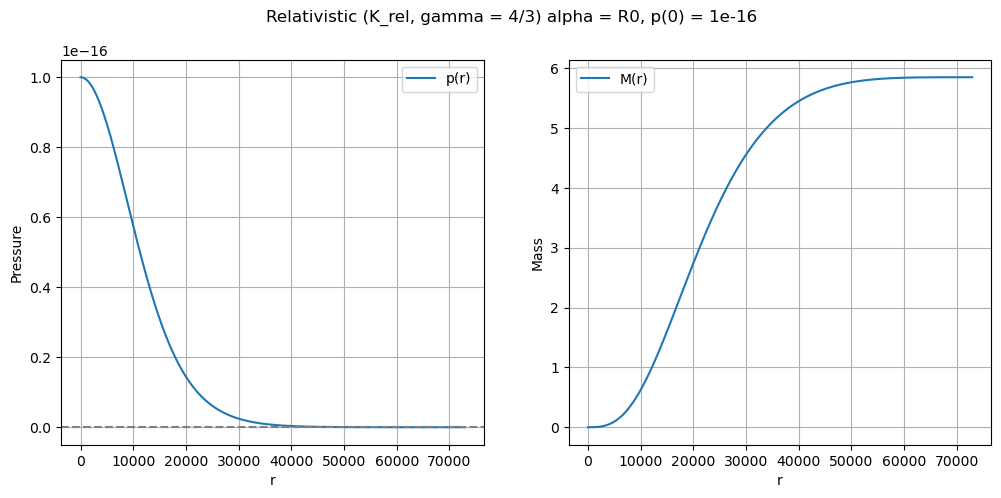

R = 72938.14858247717
M(R) = 5.84765075417844 solar masses
M(R) = 1.1631562115136335e+31 kg
p(R)= -1.8644738307977087e-30 almost zero


In [12]:
AZ = 1
K_rel = (hbar * c / 12 / np.pi**2 * ((3 * np.pi**2)/ (931.5 * u.MeV * AZ)) **(4/3)).to('cm / erg**(1/3)')
gamma = 4/3
R0 = 1.473 * u.km

alpha = R0

e_0 = (( (R0 / alpha) ** gamma / K_rel ) **( 1/(gamma-1))).to('erg/cm3')

#e_0 = 7.463e39 * u.erg / u.cm**3
beta = (4 * np.pi * e_0 / (1.9891e30 * u.kg * c**2 * (K_rel * e_0 **(gamma-1))**(1/gamma))).to('1/km3')
    

def ode(x, r):

    p, M = x
    if p <= 0:
        return [0, 0]  
    
    dpdr = - alpha.value * M * p**(1/gamma) / r**2
    dMdr = beta.value * r**2 * p**(1/gamma)
    return [dpdr, dMdr]

x_init = [1e-16, 0]
r = np.linspace(0.01, 100000, 500000)  # integra llarg

sol = odeint(ode, x_init, r)

p = sol[:,0]
M = sol[:,1]

idx = np.where(p<=0)[0] # array amb els índexs on p<=0
if len(idx) > 0: 
    cutoff = idx[0]
    r = r[:cutoff+1]
    p = p[:cutoff+1]
    M = M[:cutoff+1]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.plot(r, p, label="p(r)")
ax1.axhline(0, color="gray", linestyle="--")
ax1.set_xlabel('r')
ax1.set_ylabel('Pressure')
ax1.legend()
ax1.grid()


ax2.plot(r, M, label="M(r)")
ax2.set_xlabel('r')
ax2.set_ylabel('Mass')
ax2.grid()
ax2.legend()

fig.suptitle('Relativistic (K_rel, gamma = 4/3) alpha = R0, p(0) = 1e-16')

plt.show()


print("R =", r[-1])
print("M(R) =", M[-1], 'solar masses')
print("M(R) =", M[-1]* 1.9891e30, 'kg')  # Convert to kg using solar mass
print('p(R)=',p[-1], 'almost zero')


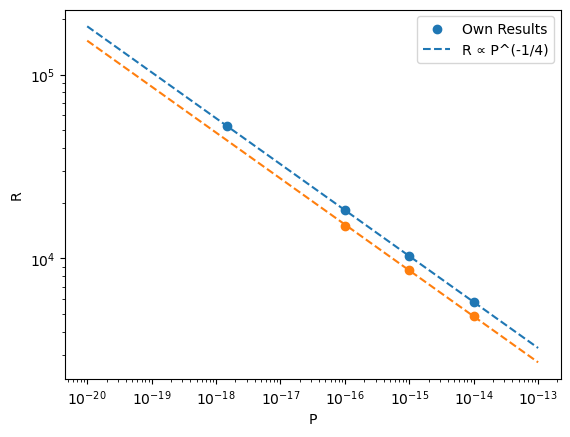

In [13]:
#vaules found:
P = [1.5e-18, 1e-14, 1e-15, 1e-16]
R = [52344, 5759, 10322, 18334]

plt.scatter(P,R, label='Own Results')

k = R[0] * (P[0]**(1/4))
x = np.logspace(-20, -13, 100)
y = k * x**(-1/4)
plt.plot(x, y, '--', label='R ∝ P^(-1/4)')


P = [1e-14,1e-15,1e-16]
R = [4840, 8600, 15080]
k = R[0] * (P[0]**(1/4))
x = np.logspace(-20, -13, 100)
y = k * x**(-1/4)
plt.scatter(P,R)    
plt.plot(x, y, '--')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('P')
plt.ylabel('R')
plt.legend()
plt.show()
plt.show()


# Non Relativistic Regime

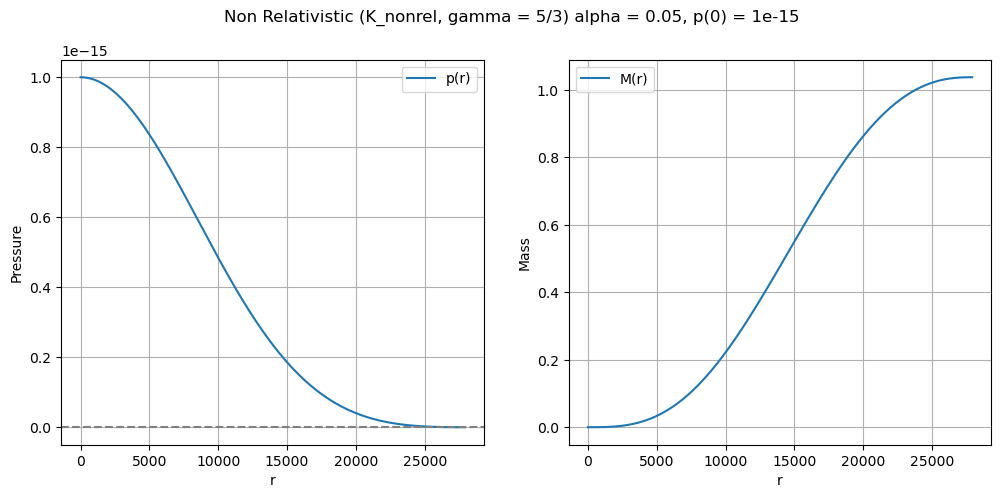

R = 27918.463045066088
M(R) = 1.037043392072751 solar masses
M(R) = 2.062783011171909e+30 kg
p(R)= -1.161024527689183e-26 almost zero
epsilon0 3.58801297846283e+36 erg / cm3
K_nonrel 1.1989982999472087e-22 cm2 / erg(2/3)
beta 0.0008561169656935326 1 / km3


In [18]:
AZ = 1
K_nonrel = (hbar ** 2 / 15 / np.pi**2 / m_e * ((3 * np.pi**2)/ (931.5 * u.MeV * AZ)) **(5/3)).to('cm2 / erg**(2/3)')
gamma = 5/3
R0 = 1.473 * u.km

alpha = 0.05 * u.km

e_0 = (( (R0 / alpha) ** gamma / K_nonrel ) **( 1/(gamma-1))).to('erg/cm3')

beta = (4 * np.pi * e_0 / (1.9891e30 * u.kg * c**2 * (K_nonrel * e_0 **(gamma-1))**(1/gamma))).to('1/km3')
    

def ode(x, r):

    p, M = x
    if p <= 0:
        return [0, 0]  
    
    dpdr = - alpha.value * M * p**(1/gamma) / r**2
    dMdr = beta.value * r**2 * p**(1/gamma)
    return [dpdr, dMdr]

x_init = [1e-15, 0]
r = np.linspace(0.01, 100000, 500000)  # integra llarg

sol = odeint(ode, x_init, r)

p = sol[:,0]
M = sol[:,1]

idx = np.where(p<=0)[0] # array amb els índexs on p<=0
if len(idx) > 0: 
    cutoff = idx[0]
    r = r[:cutoff+1]
    p = p[:cutoff+1]
    M = M[:cutoff+1]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.plot(r, p, label="p(r)")
ax1.axhline(0, color="gray", linestyle="--")
ax1.set_xlabel('r')
ax1.set_ylabel('Pressure')
ax1.legend()
ax1.grid()


ax2.plot(r, M, label="M(r)")
ax2.set_xlabel('r')
ax2.set_ylabel('Mass')
ax2.grid()
ax2.legend()

fig.suptitle('Non Relativistic (K_nonrel, gamma = 5/3) alpha = 0.05, p(0) = 1e-15')

plt.show()


print("R =", r[-1])
print("M(R) =", M[-1], 'solar masses')
print("M(R) =", M[-1]* 1.9891e30, 'kg')  # Convert to kg using solar mass
print('p(R)=',p[-1], 'almost zero')
print('epsilon0',e_0)
print('K_nonrel',K_nonrel)
print('beta',beta)


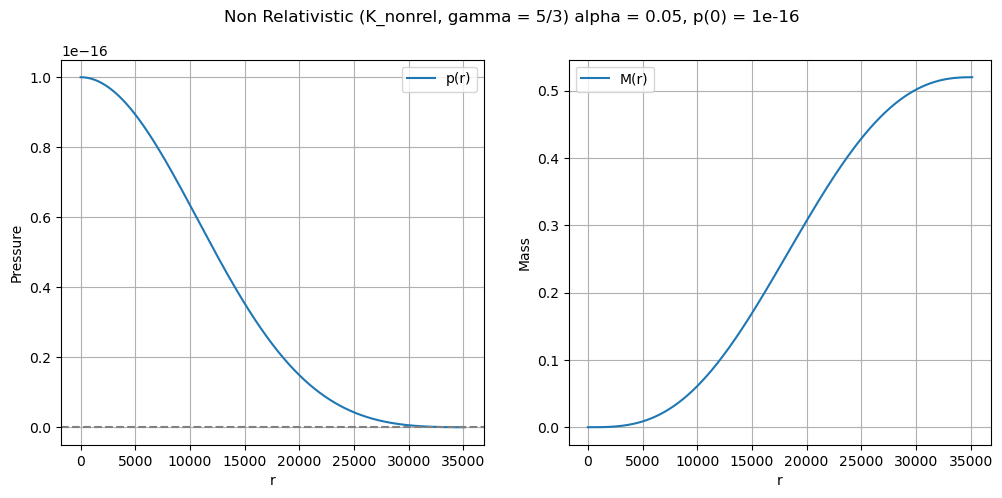

R = 35139.27676461353
M(R) = 0.5197647652943994 solar masses
M(R) = 1.0338640946470897e+30 kg
p(R)= -2.824010781032928e-27 almost zero
epsilon0 3.58801297846283e+36 erg / cm3
K_nonrel 1.1989982999472087e-22 cm2 / erg(2/3)
beta 0.0008561169656935326 1 / km3


In [19]:
AZ = 1
K_nonrel = (hbar ** 2 / 15 / np.pi**2 / m_e * ((3 * np.pi**2)/ (931.5 * u.MeV * AZ)) **(5/3)).to('cm2 / erg**(2/3)')
gamma = 5/3
R0 = 1.473 * u.km

alpha = 0.05 * u.km

e_0 = (( (R0 / alpha) ** gamma / K_nonrel ) **( 1/(gamma-1))).to('erg/cm3')

beta = (4 * np.pi * e_0 / (1.9891e30 * u.kg * c**2 * (K_nonrel * e_0 **(gamma-1))**(1/gamma))).to('1/km3')
    

def ode(x, r):

    p, M = x
    if p <= 0:
        return [0, 0]  
    
    dpdr = - alpha.value * M * p**(1/gamma) / r**2
    dMdr = beta.value * r**2 * p**(1/gamma)
    return [dpdr, dMdr]

x_init = [1e-16, 0]
r = np.linspace(0.01, 100000, 500000)  # integra llarg

sol = odeint(ode, x_init, r)

p = sol[:,0]
M = sol[:,1]

idx = np.where(p<=0)[0] # array amb els índexs on p<=0
if len(idx) > 0: 
    cutoff = idx[0]
    r = r[:cutoff+1]
    p = p[:cutoff+1]
    M = M[:cutoff+1]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.plot(r, p, label="p(r)")
ax1.axhline(0, color="gray", linestyle="--")
ax1.set_xlabel('r')
ax1.set_ylabel('Pressure')
ax1.legend()
ax1.grid()


ax2.plot(r, M, label="M(r)")
ax2.set_xlabel('r')
ax2.set_ylabel('Mass')
ax2.grid()
ax2.legend()

fig.suptitle('Non Relativistic (K_nonrel, gamma = 5/3) alpha = 0.05, p(0) = 1e-16')

plt.show()


print("R =", r[-1])
print("M(R) =", M[-1], 'solar masses')
print("M(R) =", M[-1]* 1.9891e30, 'kg')  # Convert to kg using solar mass
print('p(R)=',p[-1], 'almost zero')
print('epsilon0',e_0)
print('K_nonrel',K_nonrel)
print('beta',beta)


### Procedure explained

- Chose alpha (trial and error) 
- Compute and define K and gamma, fixed regardless of alpha 
- Compute epsilon0 and beta (function of the previous)
- Define function ODE 
- Chose initial conditions and integration range 
- Solve ODE


